### Summary of Interesting Finding from Exploratory data analysis
*  The target variable fraud_bool is highly imbalanced (1% fraud, 99% non-fraud). This imbalance suggst that normalization, resampling techniques, or model adjustments (e.g., using class weights) may be necessary in subsequent steps.
*  Missing values are represented as -1, which could skew statistical results. And it could be worth to impute missing values using appropriate methods (e.g., mean or mode) and create new columns to suggest where the value is missing.
*  Missing values in prev_address_months_count and bank_months_count are higher in fraud cases. Investigate the relationship between fraud type and missing values; explore whether fraudsters are less likely to provide certain information.
*  Violin plot suggests outliers in some variables, which may need investigation or removal. Analyze whether outliers represent rare fraud cases; decide whether to keep or remove them based on fraud association.
*  The violin plot shows significant differences in the distribution of features like credit_risk_score, date_of_birth_distinct_emails_4w, current_address_months_count, name_email_similarity, and prev_address_months_countdays between fraud and non-fraud cases.
*  Variables like source, foreign_request, phone_mobile_valid, device_distinct_emails_8w have highly imbalanced distributions (e.g., mostly "INTERNET"). However, since the dataset is imbalanced, so we still need to check the proportion of fraud for each class before removing the variable for analysis. For example, it could be the case that all the records with source other than INTERNET are fraudsters. 
*  No significant correlations were found between numerical variables in multivariate analysis. 

# 1. Import libraries and reading data

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')

from pylab import rcParams

import seaborn as sns
sns.set_style('whitegrid')
my_palette = sns.color_palette("Paired")

from scipy.stats import chi2_contingency, pearsonr

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2

pd.set_option('display.max_columns', 500)

import warnings as wr
wr.filterwarnings('ignore')

In [132]:
df_base = pd.read_csv('./archive/Base_backup.csv')
df = df_base.copy()

In [5]:
df.shape

(1000000, 32)

In [8]:
from IPython.display import display
pd.options.display.max_columns = None
display(df.head(10))

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,11556.955514,7506.951276,6482.924037,705,5,CB,134,1,BE,1,1,30,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,11723.993606,7864.277144,6338.799156,28,8,CA,72,1,BC,1,1,1,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,4999.555801,4526.861667,6426.790817,6,7,CA,163,0,BE,1,1,25,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,6979.994002,4335.685346,6624.957942,2,10,CA,35,0,BC,1,0,2,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,7549.992086,6273.922110,6312.998835,14,20,CA,201,1,BD,1,1,15,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [11]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [26]:
print(f"Number of duplicate records in the data: {df.duplicated().sum()}")

Number of duplicate records in the data: 0


# 2. Helper functions

In [79]:
# split categorical and numerical features
def split_num_cat(df):
    """
    Function to split columns into two, one having categorical features and another having numerical feautures
    Parameters
    ----------
    df : dataframe
            pass in full dataframe
    ----------
    Returns: 
        a list of categorical features
        a list of numerical features
    """
    categorical_features = []
    numerical_features = []

    for x in df.columns: 
        if df[x].nunique() > 12:
            numerical_features.append(x)
        elif df[x].nunique() >=2:
            categorical_features.append(x)

    if 'fraud_bool' in categorical_features:
        categorical_features.remove('fraud_bool')
    
    return categorical_features, numerical_features

def drop_unnecessary_columns(df, column_name):
    """
    Function to delete the list of columns 
    Parameters
    ----------
    df : dataframe
            pass in full dataframe
    column_name : list
            pass in list of full column
    ----------
    Returns: Dataframe
    """
    df = df.drop(column_name, axis=1)
    return df

def print_unique_values(df):
    """
    Function to print unique values in categorical datatypes 
    Parameters
    ----------
    df : dataframe
            pass in full dataframe
    ----------
    Returns: None
    """
    
    print("unique values\n")
    for col in df.columns:
        if df[col].dtypes=='object':
            if len(df[col].unique())>5:
                print('{:>15s} \t more than 5 unique'.format(col))
            else:
                print('{:>15s} \t {}'.format(col,df[col].unique() ))

## 3. Preliminary data analysis

#### 3.1 Drop features with no variance

In [86]:
constant_feature =[]
for x in df.columns:
    if df[x].nunique() == 1:
        constant_feature.append(x)

print("Constant features:", constant_feature)

Constant features: ['device_fraud_count']


In [87]:
df = drop_unnecessary_columns(df, df[constant_feature])

#### 3.2 Split categorical and numerical features

In [41]:
categorical_features, numerical_features = split_num_cat(df)
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'month']
Numerical features: ['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes']


#### 3.3 Distribution of the target feature

In [44]:
df_fraud_only = df[df['fraud_bool'] == 1]
df_non_fraud_only = df[df['fraud_bool'] == 0]
print("Proportion of 'fraud' vs 'not fraud' {:>3.2f}%".format(len(df_fraud_only)/len(df_non_fraud_only)*100))

Proportion of 'fraud' vs 'not fraud' 1.12%


In [47]:
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

             count
fraud_bool        
0           988971
1            11029


#### 3.4 Proportion of missing values

In [48]:
missing_value_val = [x for x in df_base.columns if (df_base[x].min() == -1)]

print("Features with missing values represented by -1:")
print(missing_value_val)

Features with missing values represented by -1:
['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']


In [49]:
missing_vals = pd.DataFrame()

missing_features = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col
    
missing_vals = pd.DataFrame(missing_vals.T.stack())

missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                        feature  fraud_bool  missing_vals
0     prev_address_months_count           0         71.06
1     prev_address_months_count           1         91.89
2  current_address_months_count           0          0.43
3  current_address_months_count           1          0.13
4             bank_months_count           0         25.23
5             bank_months_count           1         37.54
6     session_length_in_minutes           0          0.20
7     session_length_in_minutes           1          0.16
8     device_distinct_emails_8w           0          0.04
9     device_distinct_emails_8w           1          0.04


## 4. Exploratory analysis

### 4.1 Target variable - fraud_bool

<Axes: xlabel='fraud_bool', ylabel='count'>

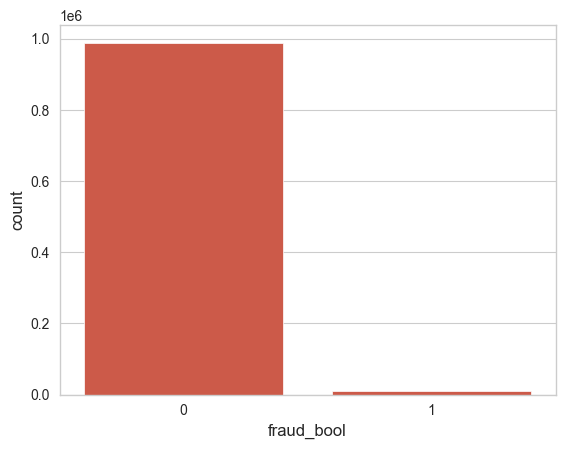

In [52]:
sns.countplot(x='fraud_bool', data=df)

### 4.2 Numerical Variables

In [55]:
print("Numerical features:", numerical_features)

Numerical features: ['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes']


#### 4.2.1 Distribution of each numerical feature in terms of the target value in KDE plot 

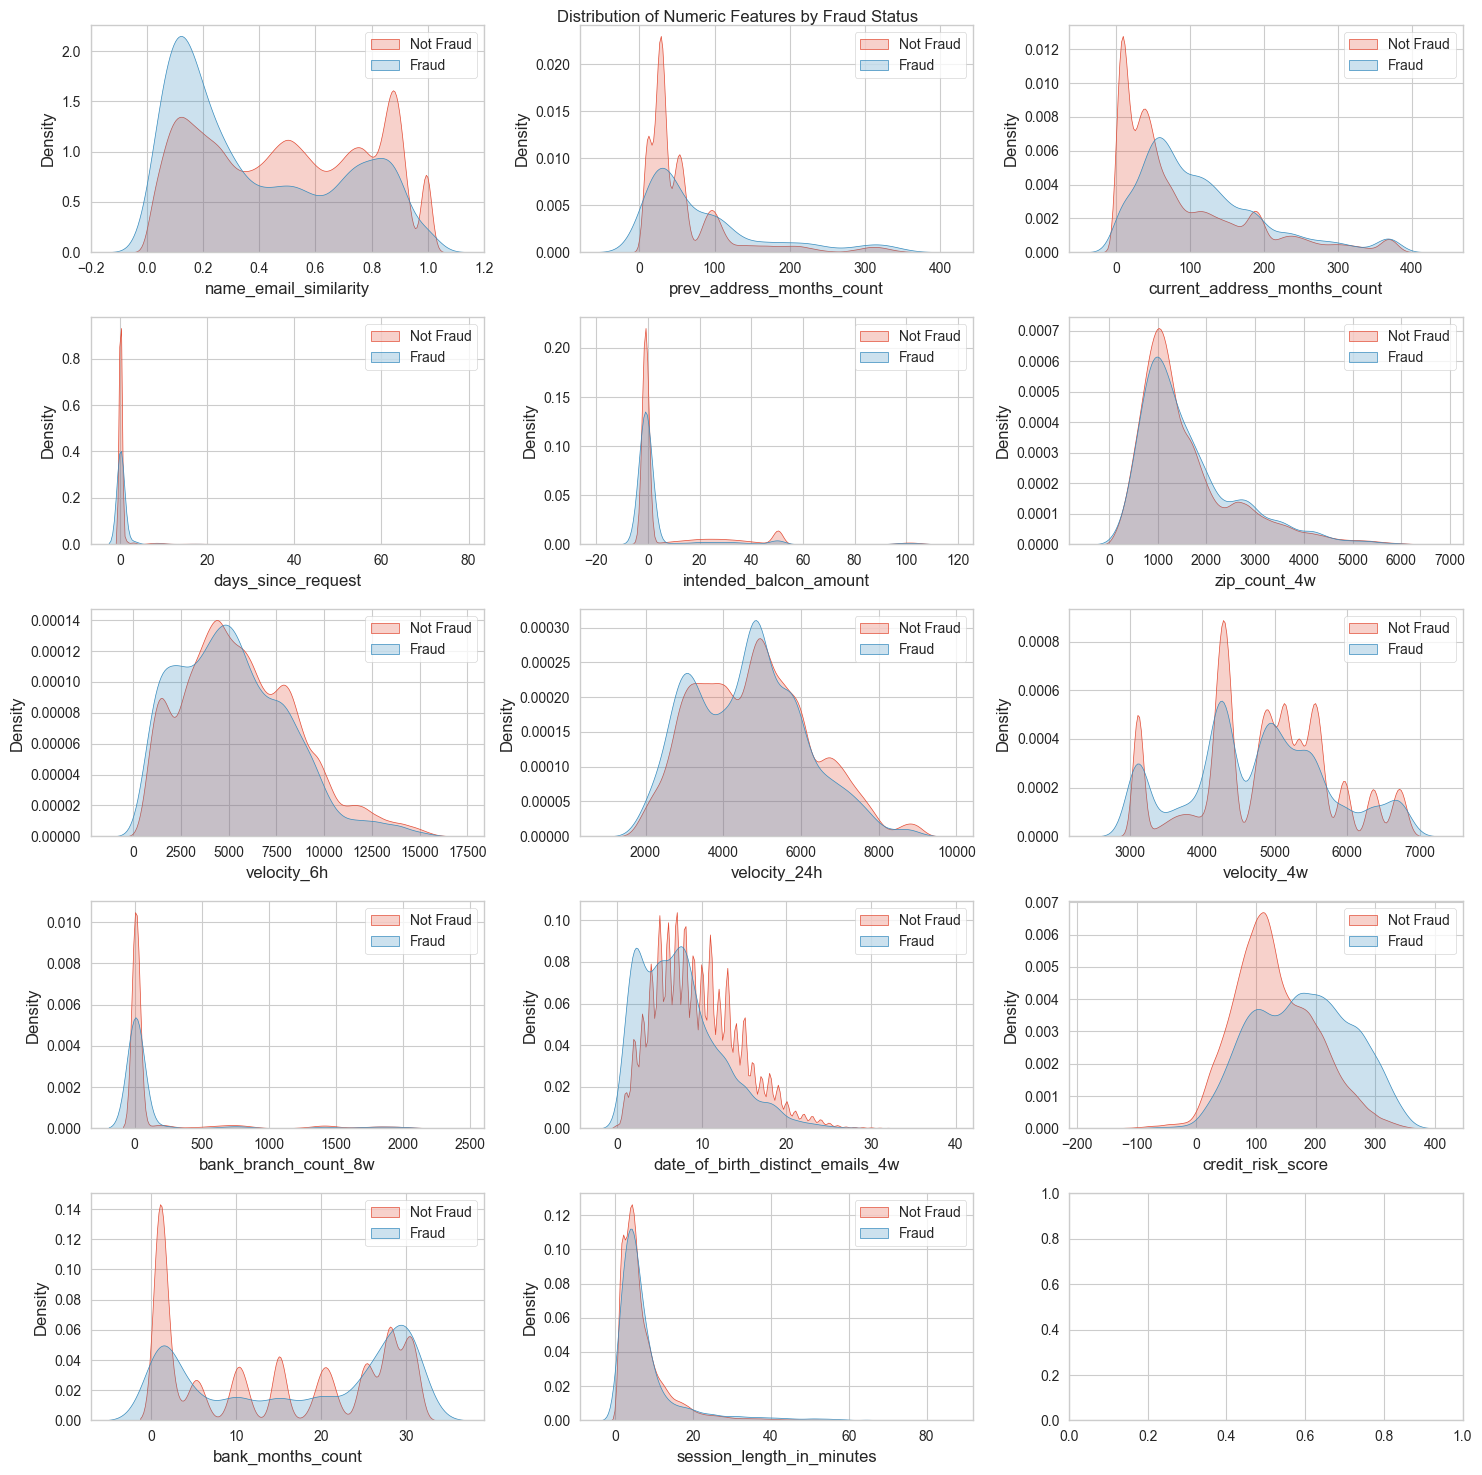

In [57]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numerical_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

#### 4.2.2 Violin Plots - the median, quartiles, and outliers, split by target value.

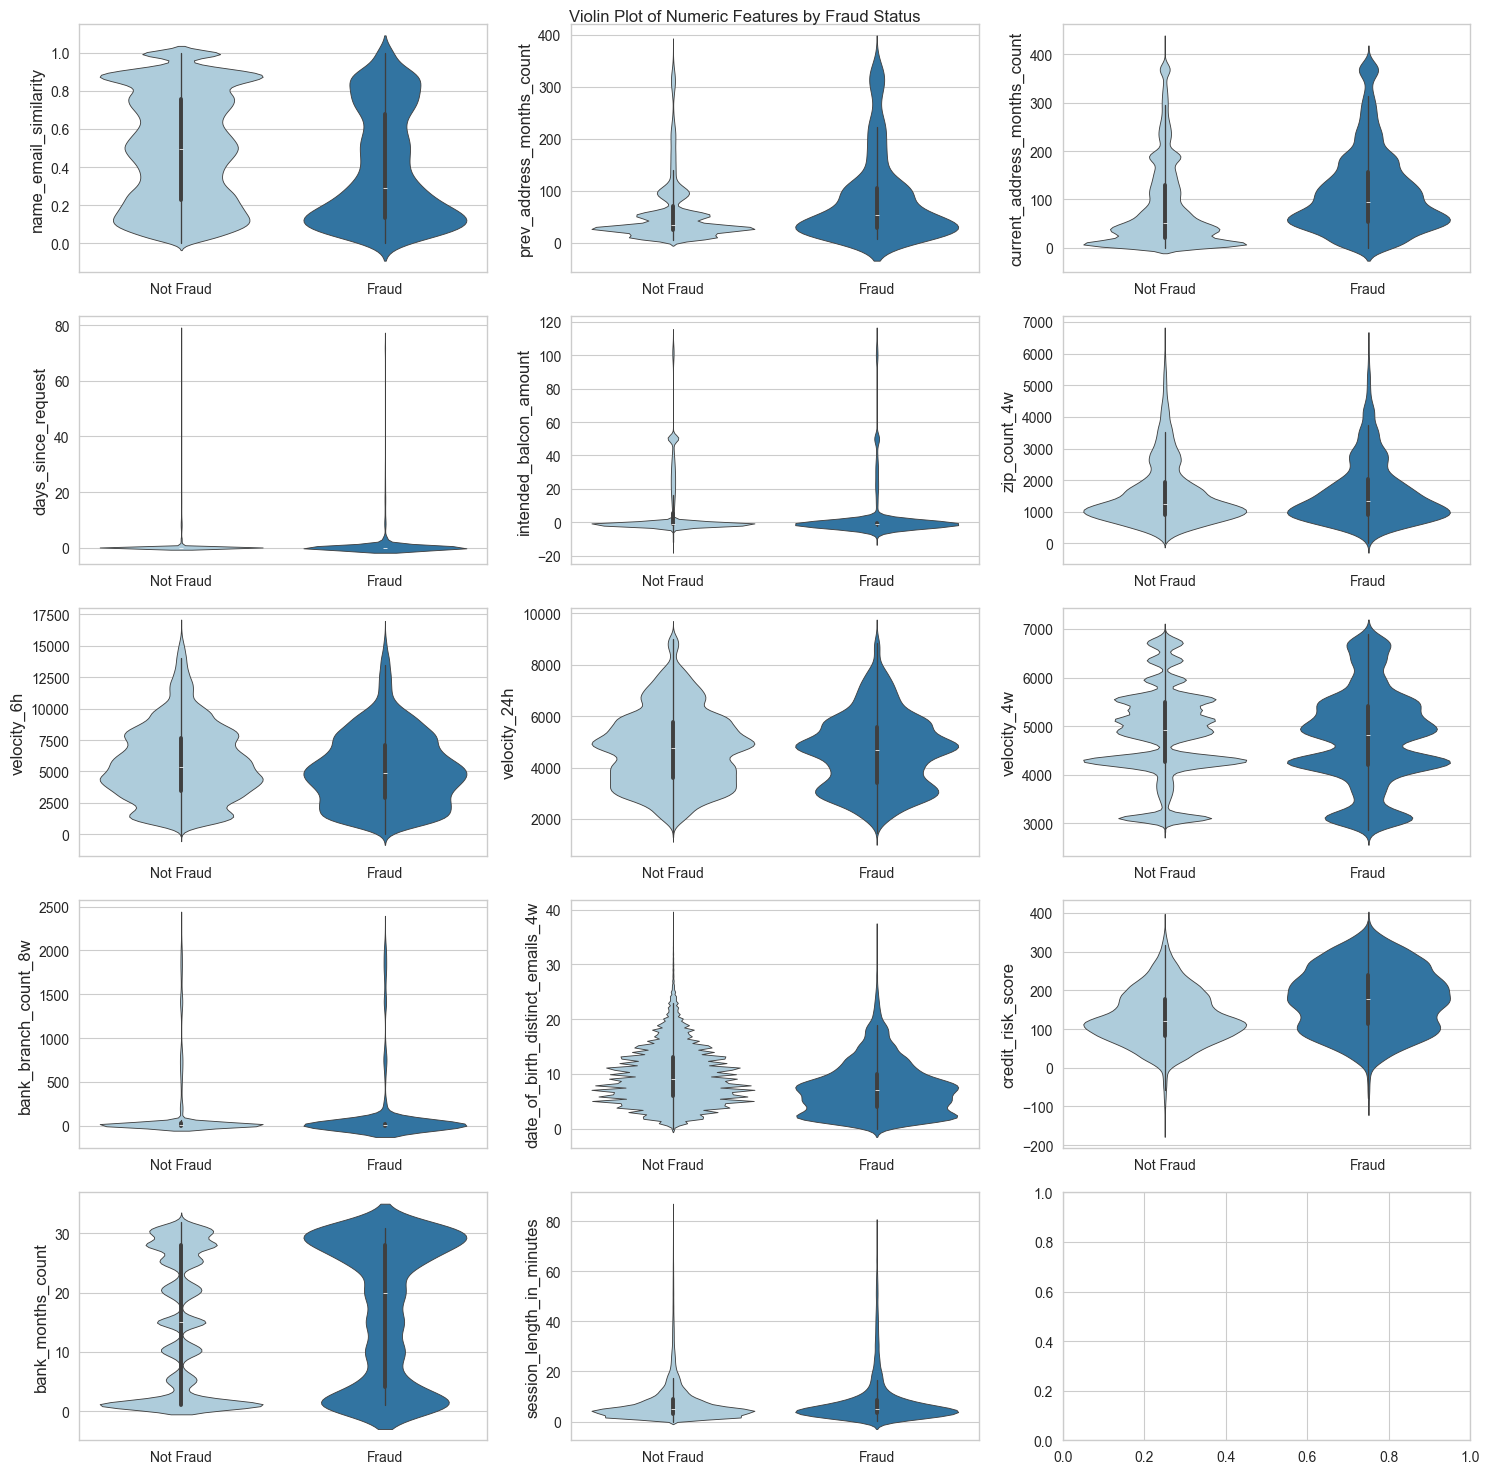

In [58]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.suptitle('Violin Plot of Numeric Features by Fraud Status')

for i, feature in enumerate(numerical_features):
    ax = axes[i // 3][i % 3]
    sns.violinplot(data=df, x='fraud_bool', y=feature, ax=ax, palette='Paired')
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

####  4.2.3 Scatterplot of numerical features against fraud type

####  4.2.4 Multivariate Analysis - correlation matrix plot

In [11]:
df_corr = df_base[numerical_features].corr()
df_corr

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,session_length_in_minutes
name_email_similarity,1.000000,-0.018186,0.050305,-0.007736,0.029040,0.025114,0.024881,0.035221,0.039968,-0.001470,0.022994,0.049126,-0.006351,0.005998
prev_address_months_count,-0.018186,1.000000,-0.271730,0.078107,-0.009428,-0.029638,-0.001265,0.009020,0.005413,-0.040628,0.059560,-0.016104,-0.045550,0.051425
current_address_months_count,0.050305,-0.271730,1.000000,-0.057836,0.057601,0.047286,0.027508,0.018753,0.026172,0.054202,-0.174714,0.094976,0.071997,-0.033574
days_since_request,-0.007736,0.078107,-0.057836,1.000000,0.019782,0.000249,0.027968,0.023869,0.017706,-0.018173,0.018731,-0.088141,-0.027460,0.049613
intended_balcon_amount,0.029040,-0.009428,0.057601,0.019782,1.000000,0.002251,0.042849,0.064080,0.051407,0.102919,-0.027343,0.002058,0.178374,0.022811
zip_count_4w,0.025114,-0.029638,0.047286,0.000249,0.002251,1.000000,0.142372,0.201186,0.302955,0.005958,0.126885,-0.102645,0.053637,0.039687
velocity_6h,0.024881,-0.001265,0.027508,0.027968,0.042849,0.142372,1.000000,0.464003,0.400254,0.020140,0.118752,-0.145254,0.014874,0.054491
velocity_24h,0.035221,0.009020,0.018753,0.023869,0.064080,0.201186,0.464003,1.000000,0.539115,0.036062,0.155434,-0.146770,0.018855,0.066875
velocity_4w,0.039968,0.005413,0.026172,0.017706,0.051407,0.302955,0.400254,0.539115,1.000000,0.031267,0.242365,-0.168766,0.032344,0.079005
bank_branch_count_8w,-0.001470,-0.040628,0.054202,-0.018173,0.102919,0.005958,0.020140,0.036062,0.031267,1.000000,-0.036952,-0.014569,0.142625,0.004887


<Axes: >

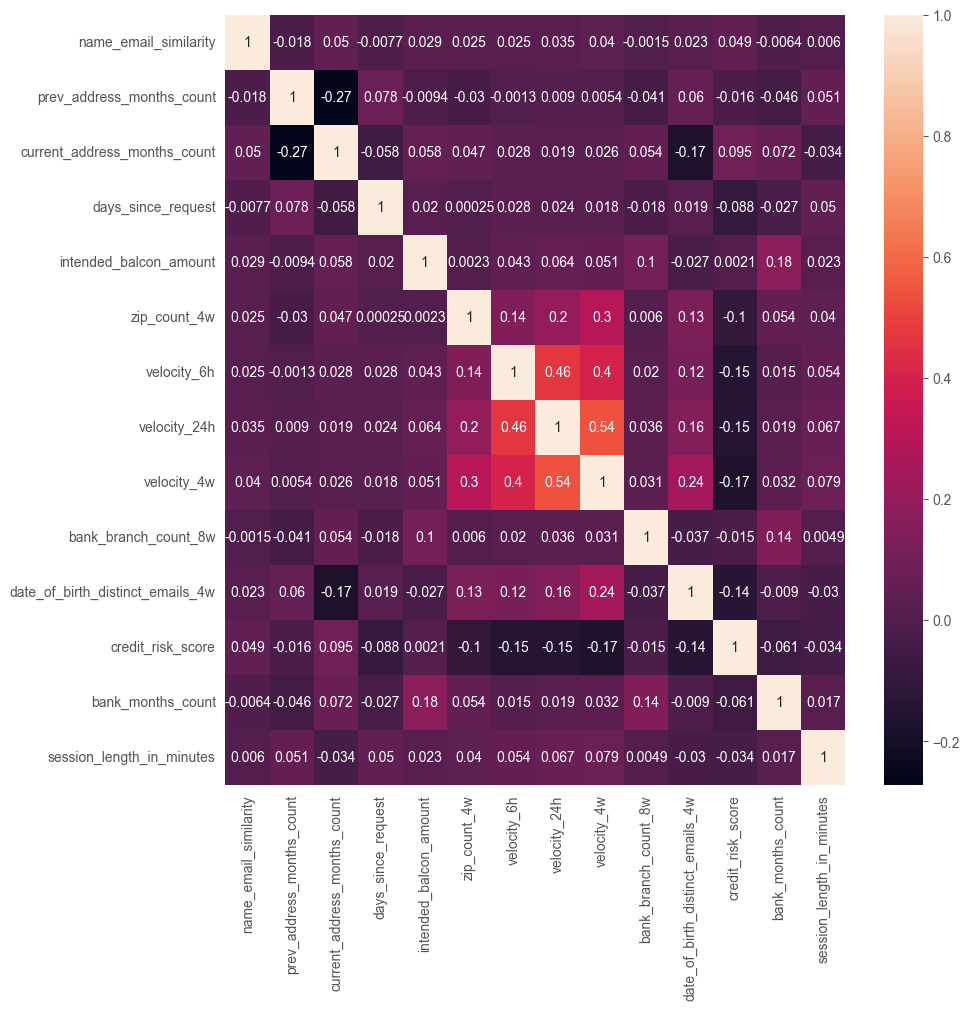

In [17]:
plt.figure(figsize=(10, 10))
# sns.heatmap(df_corr, annot=True, cmap='Pastel2')
sns.heatmap(df_corr, xticklabels=df_corr.columns.values,  annot=True, yticklabels = df_corr.columns.values)

### 4.3 Categorical Variables

In [63]:
print("Categorical features:", categorical_features)

Categorical features: ['income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


#### 4.3.1 Countplots of categorical features

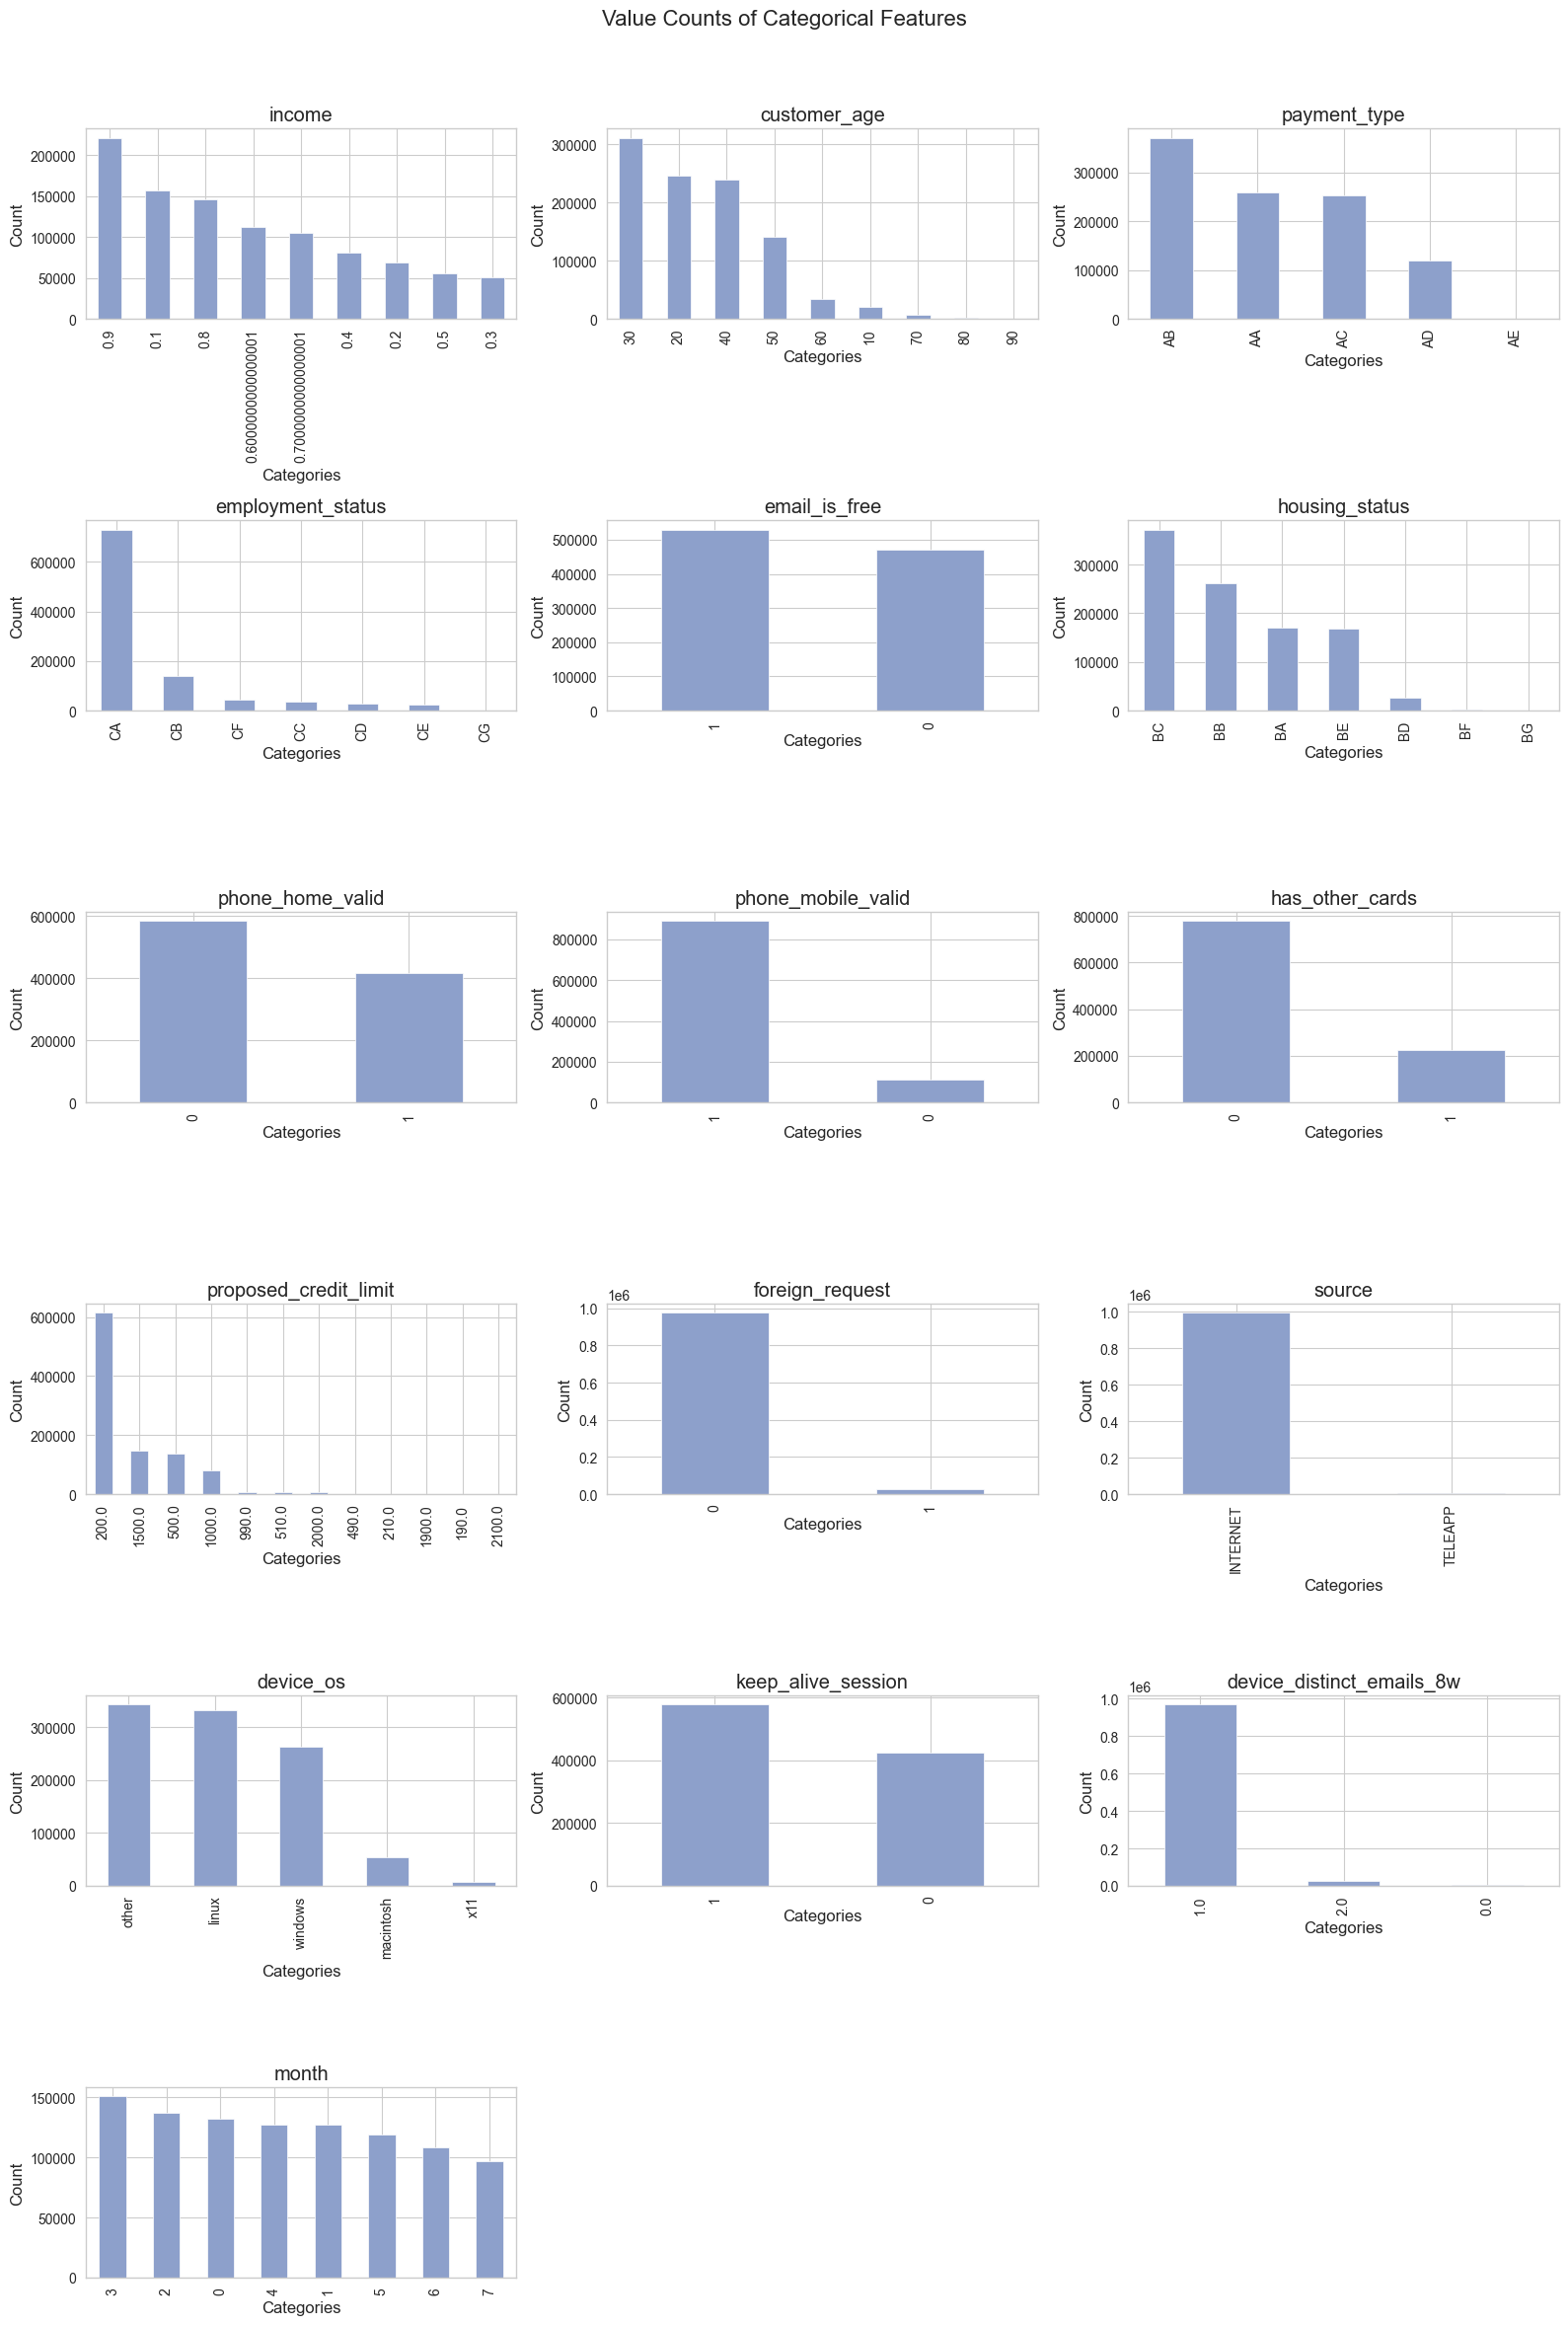

In [65]:
cols = 3
rows = 6

fig, axes = plt.subplots(rows, cols, figsize=(16, 24))
fig.suptitle("Value Counts of Categorical Features", fontsize=16)
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[idx], title=f"{feature}", color='#8da0cb' )
    axes[idx].set_xlabel("Categories")
    axes[idx].set_ylabel("Count")

for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 4.3.2 Proportion of Categorical Features by fraud type

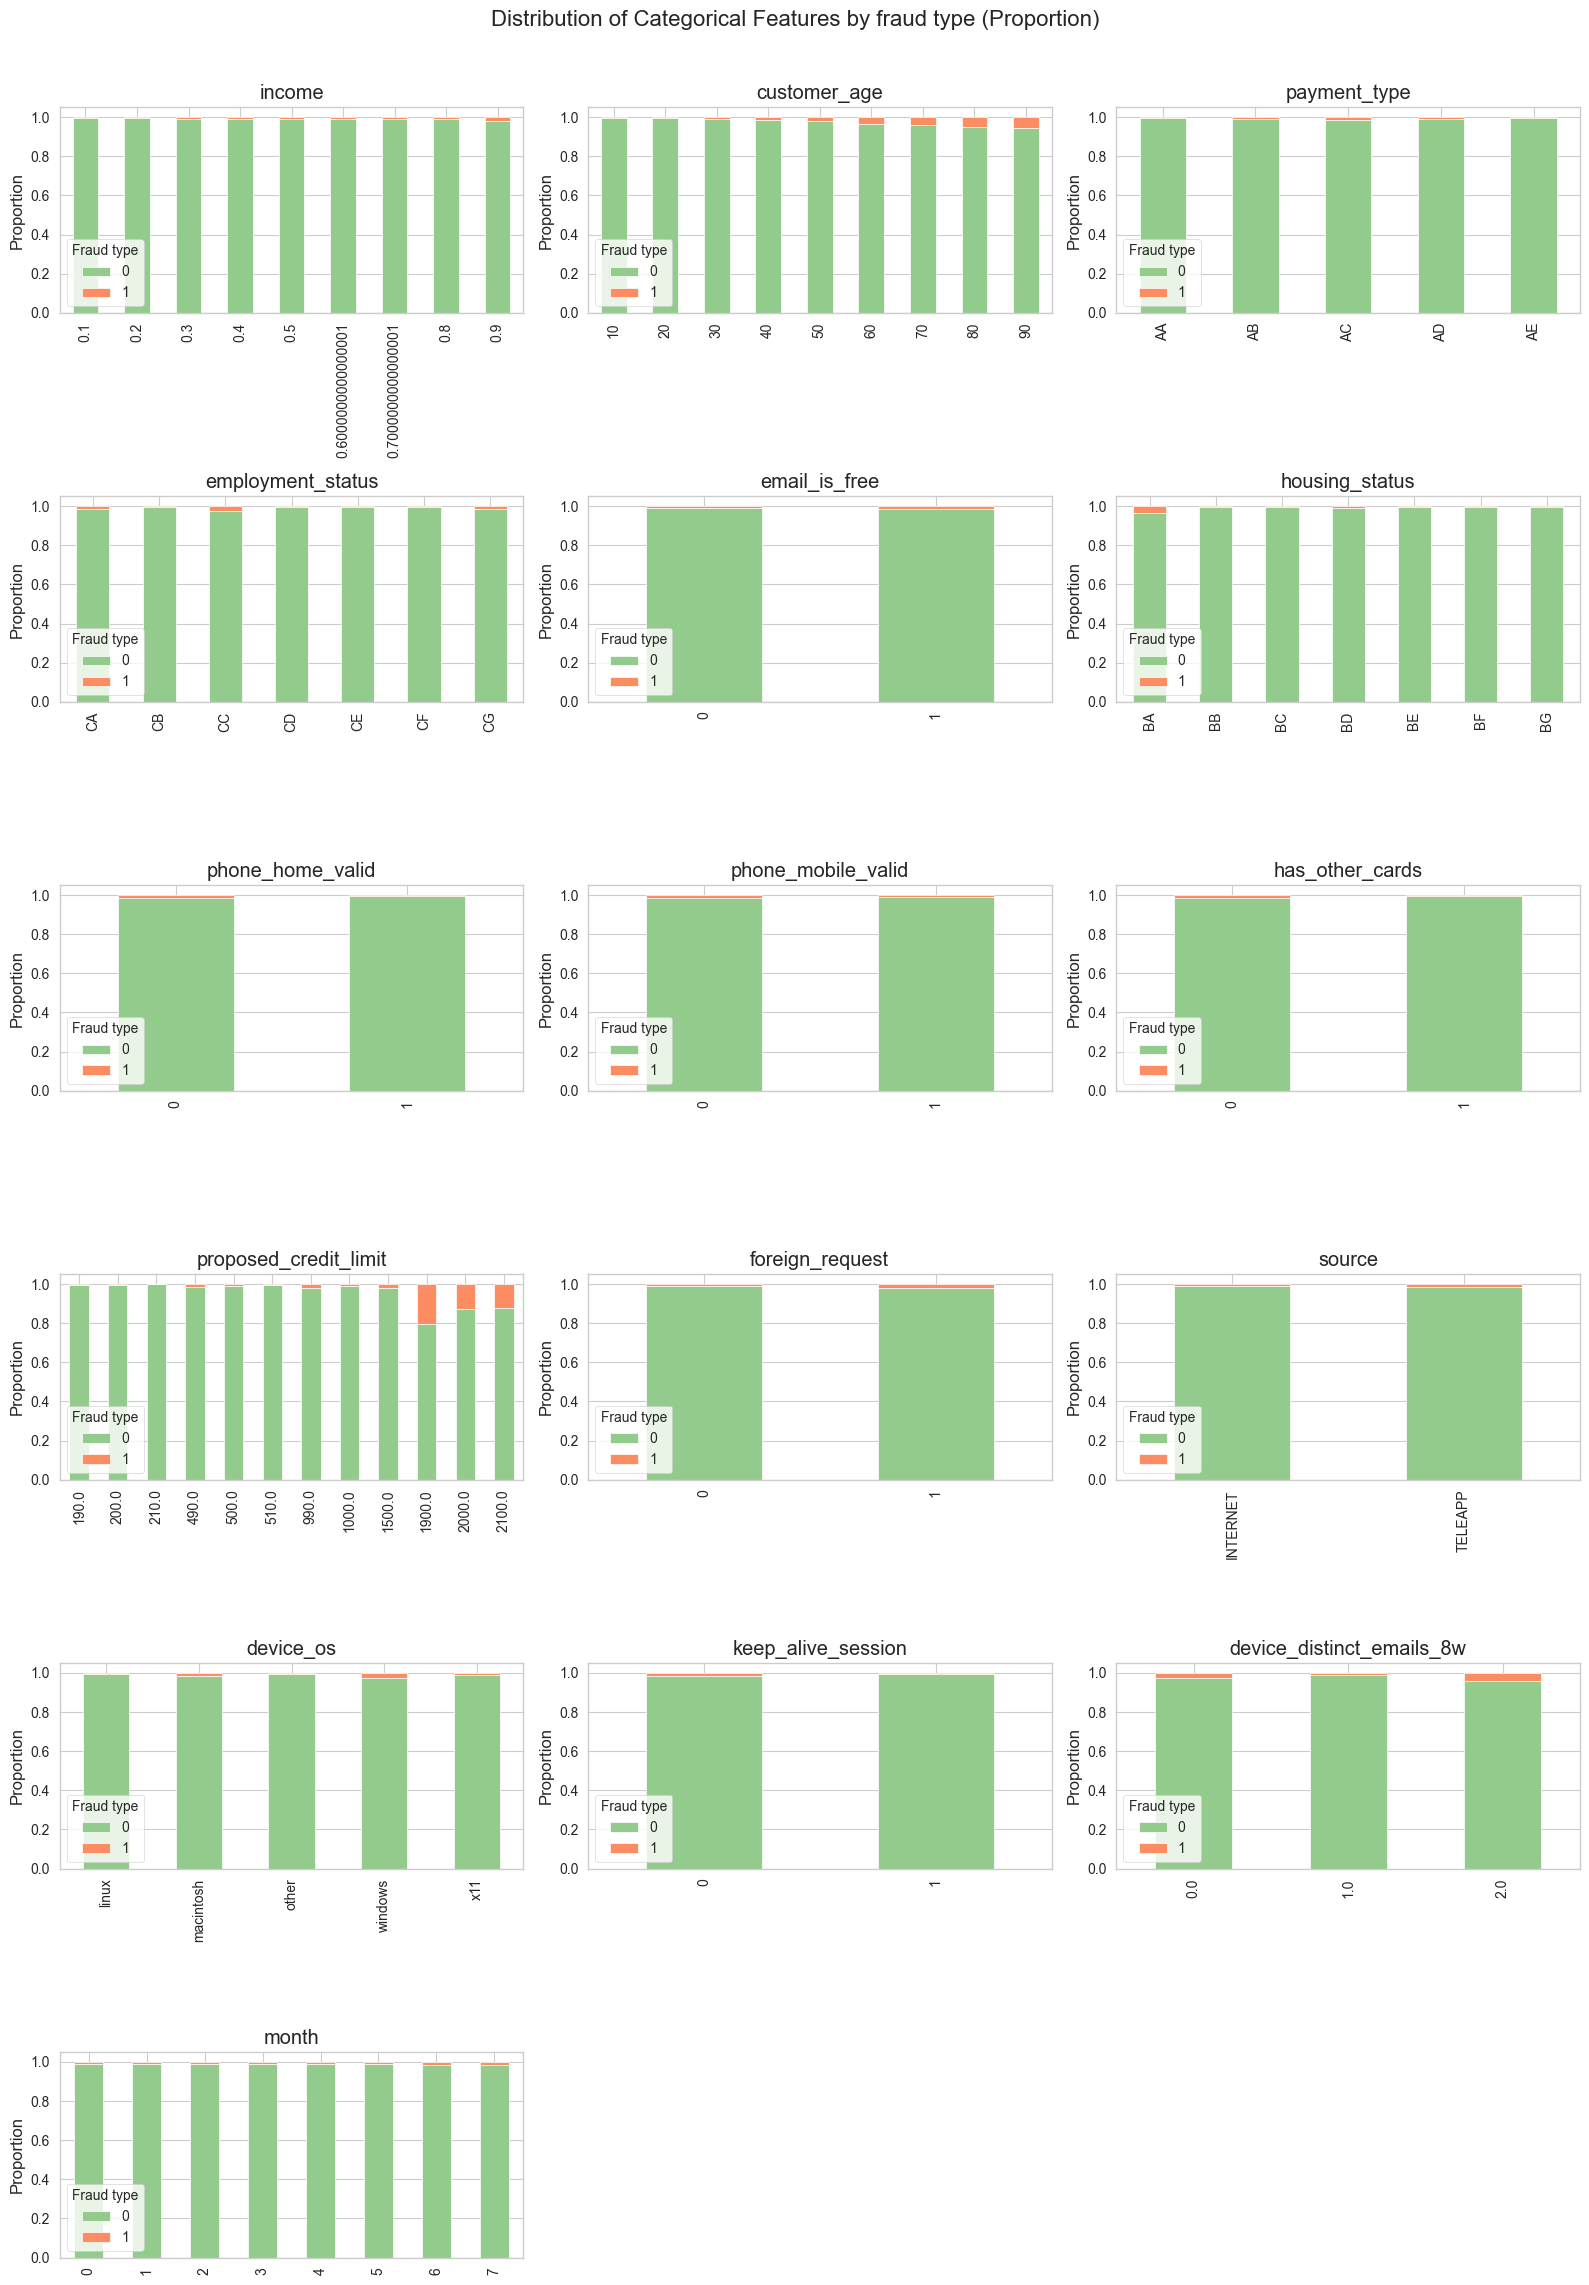

In [68]:
fig, axes = plt.subplots(6, 3, figsize=(16, 24))
axes = axes.flatten()
fig.suptitle('Distribution of Categorical Features by fraud type (Proportion)', fontsize=16)

for idx, feature in enumerate(categorical_features):
    # Calculate the proportion of fraud_bool within each category
    feature_counts = df[feature].value_counts(normalize=True).sort_index()
    plot_data = df.groupby(feature)['fraud_bool'].value_counts(normalize=True).unstack(fill_value=0)
    
    plot_data.plot(kind='bar', stacked=True, color=['#93cb8d', '#fc8d62'], ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Proportion')
    axes[idx].tick_params(axis='x')
    axes[idx].legend(title='Fraud type', loc='lower left', bbox_to_anchor=(0, 0))

for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

#### 4.3.3 Proportion of only fraud (i.e.fraud_bool = 1) by class in each categorical feature

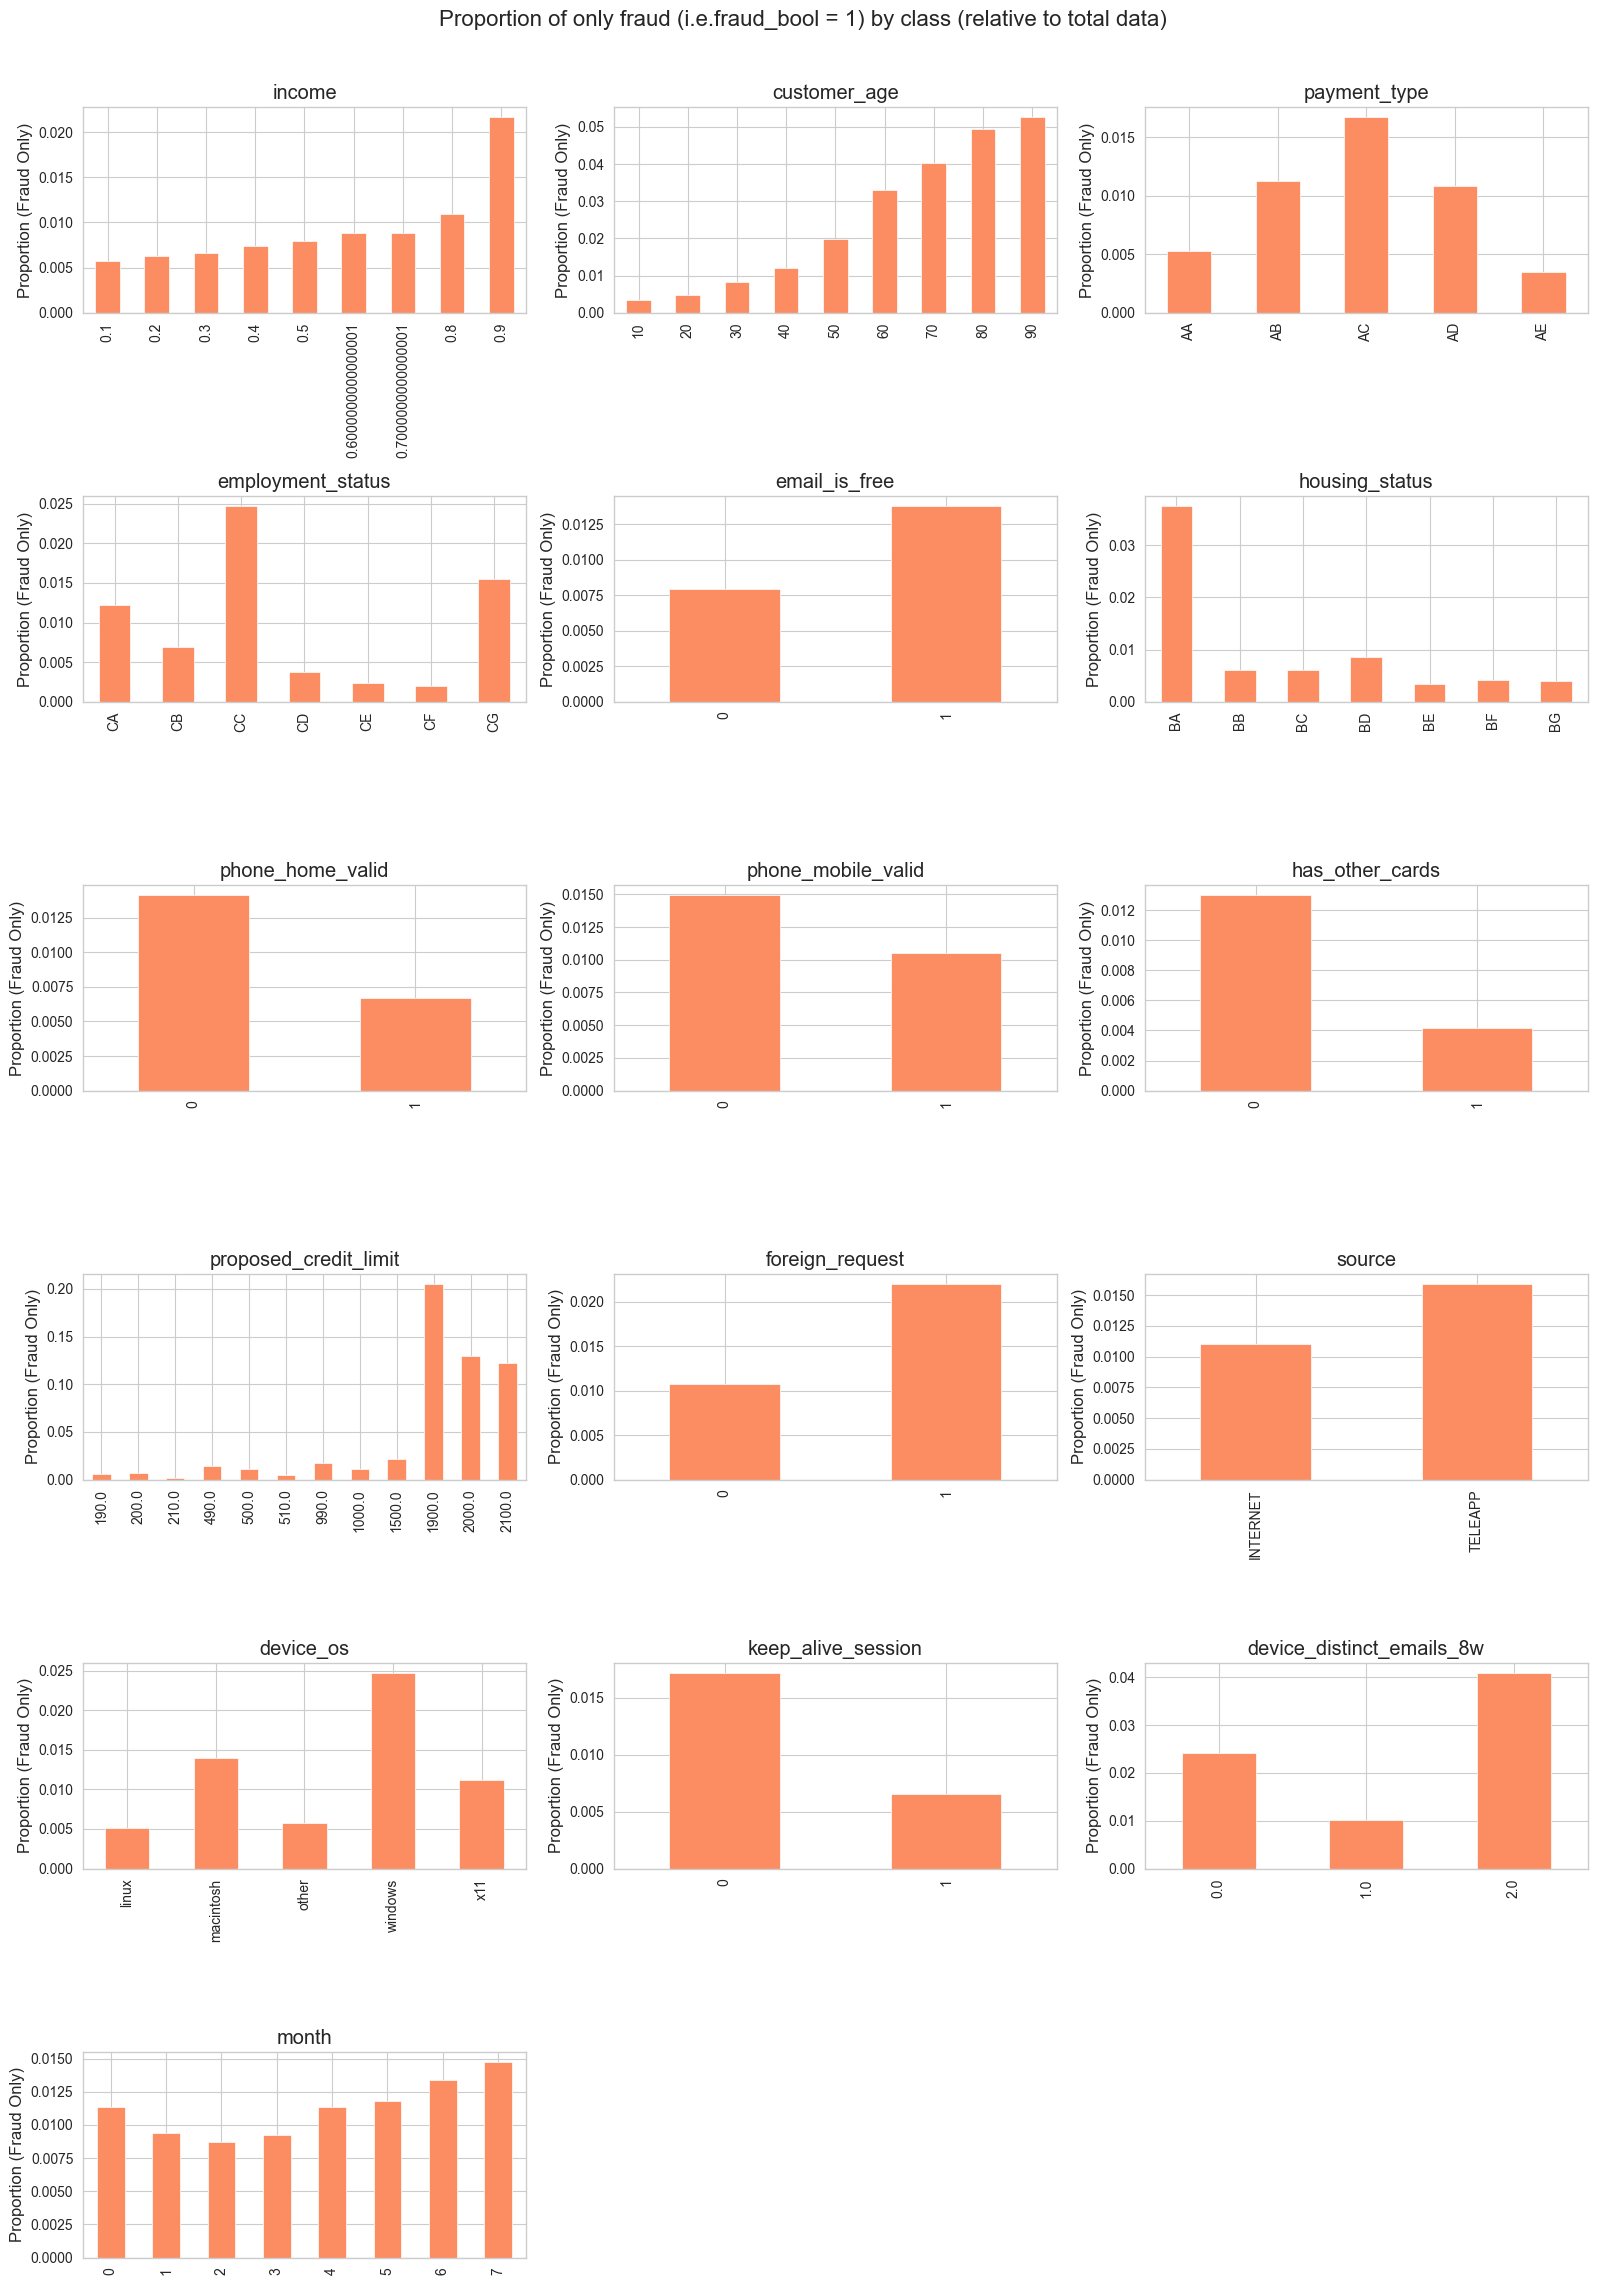

In [69]:
fig, axes = plt.subplots(6, 3, figsize=(16, 24))
axes = axes.flatten()
fig.suptitle('Proportion of only fraud (i.e.fraud_bool = 1) by class (relative to total data)', fontsize=16)

for idx, feature in enumerate(categorical_features):
    # Calculate the proportion of fraud_bool = 1 for each category relative to the total data
    plot_data = (
        df[df['fraud_bool'] == 1][feature].value_counts() / df[feature].value_counts()
    ).sort_index()
    
    # Plot the proportion for fraud_bool = 1
    plot_data.plot(kind='bar', color='#fc8d62', ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Proportion (Fraud Only)')
    axes[idx].tick_params(axis='x')

# Remove extra subplots
for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### 4.4 Ordinal variables

In [98]:
# Select categorical features with more than 2 unique values and float or integer data type
ordinal_categorical_features = [
    x for x in categorical_features
    if df_base[x].dtype in ['float64', 'int64'] and df_base[x].nunique() >2
]

print("Ordinal Categorical Features are:")
print(ordinal_categorical_features)

Ordinal Categorical Features are:
['income', 'customer_age', 'proposed_credit_limit', 'device_distinct_emails_8w', 'month']


## 5. Data preprocessing

### 5.1 Imputation for missing values¶

In [133]:
# Defining pipelines 
from sklearn.base import BaseEstimator, TransformerMixin

df = df.replace(-1, np.nan)

categorical_features, numerical_features = split_num_cat(df)

class GroupImputerWithMissingIndicator(BaseEstimator, TransformerMixin):
    def __init__(self, mode_columns, mean_columns, grouping_column):
        self.mode_columns = mode_columns
        self.mean_columns = mean_columns
        self.grouping_column = grouping_column

    def fit(self, X, y=None):
        # Compute mode for mode_columns
        self.group_modes = {}
        for column in self.mode_columns:
            self.group_modes[column] = (
                X.loc[X[column] != -1].groupby(self.grouping_column)[column].apply(lambda x: x.mode()[0] if not x.mode().empty else x.median())
            )
        # Compute mean for mean_columns
        self.group_means = {}
        for column in self.mean_columns:
            self.group_means[column] = (
                X.loc[X[column] != -1].groupby(self.grouping_column)[column].mean()
            )
        return self

    def transform(self, X):
        X = X.copy()
        
        # Handle mode_columns
        X[self.mode_columns] = X[self.mode_columns].replace(-1, np.nan)
        for column in self.mode_columns:
            X[column] = X.groupby(self.grouping_column)[column].transform(
                lambda x: x.fillna(self.group_modes[column].get(x.name, np.nan))
            )

        # Handle mean_columns and add missing indicators
        X[self.mean_columns] = X[self.mean_columns].replace(-1, np.nan)
        for column in self.mean_columns:
            missing_indicator_col = column + '_was_missing'
            X[missing_indicator_col] = (X[column].isna()).astype(int)
            X[column] = X.groupby(self.grouping_column)[column].transform(
                lambda x: x.fillna(self.group_means[column].get(x.name, np.nan))
            )
        
        return X

In [134]:
missing_value_val = [x for x in df_base.columns if (df_base[x].min() == -1)]

print("Features with missing values represented by -1:")
print(missing_value_val)

Features with missing values represented by -1:
['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']


In [135]:
from sklearn.pipeline import Pipeline

# Define the columns and pipeline

# For features with missing_vals_percentage < 1, impute missing values with mode of the group 
mode_columns = ['current_address_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

# For features with higher missing_vals_percentages, impute missing values with mean of the group, 
# then add a column that indicate where the value was missing
mean_columns = ['bank_months_count', 'prev_address_months_count']

grouping_column = 'fraud_bool'

pipeline = Pipeline(steps=[
    ('group_imputer_with_indicator', GroupImputerWithMissingIndicator(
        mode_columns=mode_columns,
        mean_columns=mean_columns,
        grouping_column=grouping_column
    ))
])

# Apply the pipeline
df_imputed = pipeline.fit_transform(df)

# Verify the transformation
print("Count of -1 values after imputation:")
print((df_imputed[mode_columns + mean_columns] == -1).sum())

print("Counts in '_was_missing' columns:")
print(df_imputed[['bank_months_count_was_missing', 'prev_address_months_count_was_missing']].value_counts())


Count of -1 values after imputation:
current_address_months_count    0
session_length_in_minutes       0
device_distinct_emails_8w       0
bank_months_count               0
prev_address_months_count       0
dtype: int64
Counts in '_was_missing' columns:
bank_months_count_was_missing  prev_address_months_count_was_missing
0                              1                                        548152
                               0                                        198213
1                              1                                        164768
                               0                                         88867
Name: count, dtype: int64


In [150]:
df_imputed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,60.901165,34.142077,5.000000e+00,60.648563,60.648563,60.648563,383.000000
current_address_months_count,1000000.0,86.618219,88.377876,0.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


### 5.2 One-hot encode for categorical features

In [136]:
# One-hot encoding for categorical featuers with dtype as 'object'
object_features = [col for col in df_new.columns if df_new[col].dtypes == 'object']
print(object_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [153]:
df_new = pd.DataFrame(pd.get_dummies(df_new, prefix=object_features, dtype=np.int64))
df_new.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,bank_months_count_was_missing,prev_address_months_count_was_missing,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,60.648563,25.0,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163.0,1,0,1,9.0,0,1500.0,0,16.224843,1,1.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,0.8,0.617426,60.648563,89.0,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154.0,1,1,1,2.0,0,1500.0,0,3.363854,1,1.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0.8,0.996707,9.000000,14.0,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89.0,1,0,1,30.0,0,200.0,0,22.730559,0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0.6,0.475100,11.000000,14.0,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90.0,1,0,1,1.0,0,200.0,0,15.215816,1,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0,0.9,0.842307,60.648563,29.0,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91.0,0,1,1,26.0,0,200.0,0,3.743048,0,1.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [154]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,60.901165,34.142077,5.000000e+00,60.648563,60.648563,60.648563,383.000000
current_address_months_count,1000000.0,86.618219,88.377876,0.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


## <font color=red> need to fix the code below for one-hot encoding!! <font/>

In [115]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder

# df = df.replace(-1, np.nan)

# categorical_features, numerical_features = split_num_cat(df)

# # Preprocessing for categorical data, one-hot encoding for object dtypes and impute the missing values with mode
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', dtype=np.int64))
# ])

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, categorical_features)
#     ])

# from sklearn.ensemble import RandomForestClassifier
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

# # Fit the pipeline to the data (example usage)
# # X is the feature matrix and y is the target
# X = df.drop('fraud_bool', axis=1)
# y = df['fraud_bool']

# # Fit and transform the data
# model_pipeline.fit(X, y)
# X_preprocessed = preprocessor.fit_transform(X)

In [151]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder

# # One-hot encoding for categorical featuers with dtype as 'object'
# object_features = [col for col in df_new.columns if df_new[col].dtypes == 'object']

# # Create the one-hot encoding transformer
# one_hot_transformer = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(dtype=np.int64, 
#                                  drop='first', 
#                                  handle_unknown='ignore'), object_features)
#     ],
#     remainder='passthrough'
# )

# pipeline = Pipeline(steps=[
#     ('onehot_encoding', one_hot_transformer)
# ])

# df_encoded_array = pipeline.fit_transform(df_imputed)

# # Convert back to DataFrame
# encoded_feature_names = one_hot_transformer.named_transformers_['onehot'].get_feature_names_out(object_features)
# all_columns = [col for col in df_imputed.columns if col not in object_features] + list(encoded_feature_names)
# df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)

# # # Display the encoded DataFrame
# df_encoded.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,bank_months_count_was_missing,prev_address_months_count_was_missing,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.986506,60.648563,25.0,40.0,0.006735,102.453711,1059.0,13096.035018,7850.955007,6742.080561,5.0,5.0,163.0,1.0,0.0,1.0,9.0,0.0,1500.0,0.0,16.224843,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.8,0.617426,60.648563,89.0,20.0,0.010095,-0.849551,1658.0,9223.283431,5745.251481,5941.664859,3.0,18.0,154.0,1.0,1.0,1.0,2.0,0.0,1500.0,0.0,3.363854,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.8,0.996707,9.000000,14.0,40.0,0.012316,-1.490386,1095.0,4471.472149,5471.988958,5992.555113,15.0,11.0,89.0,1.0,0.0,1.0,30.0,0.0,200.0,0.0,22.730559,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.475100,11.000000,14.0,30.0,0.006991,-1.863101,3483.0,14431.993621,6755.344479,5970.336831,11.0,13.0,90.0,1.0,0.0,1.0,1.0,0.0,200.0,0.0,15.215816,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.9,0.842307,60.648563,29.0,40.0,5.742626,47.152498,2339.0,7601.511579,5124.046930,5940.734212,1.0,6.0,91.0,0.0,1.0,1.0,26.0,0.0,200.0,0.0,3.743048,0.0,1.0,0.0,0.0,0.0,1.0


In [152]:
# df_encoded.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.370554,0.482953,0.000000e+00,0.000000,0.000000,1.000000,1.000000
income,1000000.0,0.252071,0.434202,0.000000e+00,0.000000,0.000000,1.000000,1.000000
name_email_similarity,1000000.0,0.118837,0.323597,0.000000e+00,0.000000,0.000000,0.000000,1.000000
prev_address_months_count,1000000.0,0.000289,0.016998,0.000000e+00,0.000000,0.000000,0.000000,1.000000
current_address_months_count,1000000.0,0.138288,0.345202,0.000000e+00,0.000000,0.000000,0.000000,1.000000
customer_age,1000000.0,0.037758,0.190611,0.000000e+00,0.000000,0.000000,0.000000,1.000000
days_since_request,1000000.0,0.026522,0.160682,0.000000e+00,0.000000,0.000000,0.000000,1.000000
intended_balcon_amount,1000000.0,0.022693,0.148923,0.000000e+00,0.000000,0.000000,0.000000,1.000000
zip_count_4w,1000000.0,0.044034,0.205171,0.000000e+00,0.000000,0.000000,0.000000,1.000000
velocity_6h,1000000.0,0.000453,0.021279,0.000000e+00,0.000000,0.000000,0.000000,1.000000
